In [14]:
!pip install transformers torch pillow matplotlib opencv-python --quiet


In [15]:
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()
img_path = next(iter(uploaded))
img = Image.open(img_path).convert("RGB")
img.show()


Saving ROOF.jpg to ROOF.jpg


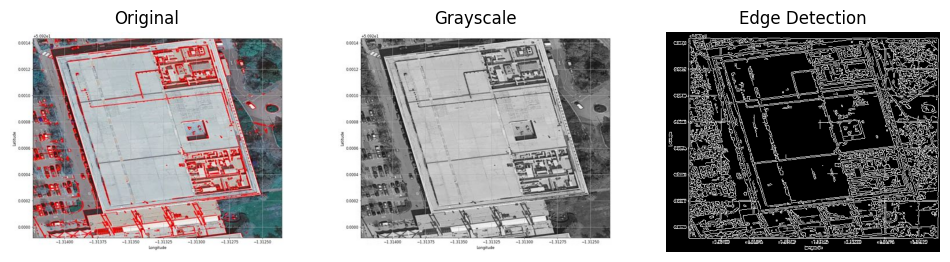

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# Rooftop
rooftop_area_pixels = np.sum(edges > 0)
img_area = img.width * img.height
usable_ratio = rooftop_area_pixels / img_area
solar_score = round(usable_ratio * 10, 1)

# Show images
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')
plt.show()


In [17]:
from transformers import pipeline

# Load GPT-Neo some privacy reason we can not use api
generator = pipeline("text-generation", model="EleutherAI/gpt-neo-125M")

prompt = f"""
You are a solar rooftop analysis expert.

Image info:
- Dimensions: {img.width} x {img.height} pixels
- Estimated Rooftop Area (pixels): {rooftop_area_pixels}
- Solar Potential Score (0–10): {solar_score}

Generate a report including:
1. Usable panel installation area
2. Installation suggestion (panel count)
3. Monthly savings estimate
4. Payback period (years)
5. Total savings over 25 years
6. Assumptions (standard panel size, sunlight hours)

Respond in a clear format.
"""

result = generator(prompt, max_length=400, do_sample=True, temperature=0.7)[0]['generated_text']

print("📋 Solar Potential Assessment Report:\n")
print(result.split(prompt)[-1].strip())


config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


📋 Solar Potential Assessment Report:

* * *

## What is solar panel installation?

Solar panel installation is a technology that is used in the production of solar panels, such as solar panels that are fabricated using the solar power from solar panels. The installation is typically performed by a professional who is familiar with the technology and the installation process. A typical installation is shown in Figure 1.1.

**Figure 1.1** Installation process

**Figure 1.2** Installation type

**Figure 1.3** Installation type

**Figure 1.4** Installation type

**Figure 1.5** Installation type

**Figure 1.6** Installation type

**Figure 1.7** Installation type

**Figure 1.8** Installation type

**Figure 1.9** Installation type

**Figure 1.10** Install

**Figure 1.11** Install

**Figure 1.12** Installation type

**Figure 1.13** Install

**Figure 1.14** Install

**Figure 1.15** Install

**Figure 1.16** Install

**Figure 1.17** Install

**Figure 1.18** Install

**Figure 1.19** Install

**Fig